In [41]:
!pip install python-slugify

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
# Importación de las librerías necesarias
from slugify import slugify
import numpy as np
import pandas as pd
import numpy
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
sns.set(style='white', context='notebook', palette='deep')
from pylab import *
from matplotlib.pyplot import figure

In [2]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=True)

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

In [3]:
ds = pd.read_csv("input/dataset_clean.csv",  index_col = 0)

def institution(row):
    for x in range(1, 10):
        if row["instlevel"+str(x)] == 1:
            return x
ds["level"] = ds.apply(institution, axis=1)

ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona,level
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,techoentrepiso,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana,8.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana,5.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana,5.0


In [4]:
df = ds[['v2a1', "age", "escolari","instlevel1", "instlevel2", "instlevel3", "instlevel4", "instlevel5", "instlevel6", "instlevel7", "instlevel8", "instlevel9", "Region", "Zona", "Target", "parentesco1", "Genero", "level"]]
df.describe()

,v2a1,age,escolari,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,Target,parentesco1,level
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9554.000000
mean,1.652316e+05,34.303547,7.200272,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,3.302292,0.311081,3.878480
std,1.504571e+05,21.612261,4.730877,0.341384,0.376140,0.405683,0.388653,0.316233,0.132568,0.123892,0.346790,0.123071,1.009565,0.462960,2.243894
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,8.000000e+04,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000
50%,1.300000e+05,31.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000
75%,2.000000e+05,51.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,5.000000
max,2.353477e+06,97.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,9.000000


In [5]:
cat = len(ds.select_dtypes(include=['object']).columns)
num = len(ds.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  20 categorical + 66 numerical = 86 features


In [6]:
len(ds.groupby("idhogar"))

2988

In [7]:
print(df[df.age.isnull()].shape)
print(df[df.escolari.isnull()].shape)
print(df[df.v2a1.isnull()].shape)

(0, 18)
(0, 18)
(6860, 18)


In [8]:
print(ds.select_dtypes(include=['object']).columns)
print(ds.select_dtypes(include=['int64','float64']).columns)


Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa', 'MaterialPared',
       'MaterialPiso', 'MaterialTecho', 'AbastecimientoAgua',
       'AbastecimientoElectricidad', 'TipoSanitario', 'EnergiaCocina',
       'EliminacionBasura', 'EstadoPared', 'EstadoTecho', 'EstadoPiso',
       'Genero', 'TipoVivienda', 'Region', 'Zona'],
      dtype='object')
Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3',
       'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'cielorazo', 'dis',
       'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4',
       'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1',
       'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5',
       'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9',
       'parentesco10', 'parentesco11', 'parentesco12', 'hogar_nin',
       'hogar_adul', 'hogar_mayor', 'hogar_total', 'meaneduc', 'i

In [9]:
ds = ds[ds.MaterialTecho.isnull() == False]

column='MaterialTecho'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 
ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona,level
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,1,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,3,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana,8.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,3,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana,5.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,3,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,3,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana,5.0


In [10]:
ds = ds[ds.MaterialTecho.isnull() == False]

column='TipoVivienda'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 
ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona,level
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,1,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,2,Central,Urbana,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,3,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,2,Central,Urbana,8.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,3,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,0,Central,Urbana,5.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,3,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,2,Central,Urbana,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,3,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,2,Central,Urbana,5.0


In [11]:
ds = ds[ds.AbastecimientoElectricidad.isnull() == False]



In [12]:

column='Region'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 

column='AbastecimientoAgua'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 

column='AbastecimientoElectricidad'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 


column='TipoSanitario'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 

column='EnergiaCocina'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 


column='EliminacionBasura'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 


column='Genero'
leGenero = preprocessing.LabelEncoder()
leGenero.fit(ds[column])
ds[column] = leGenero.transform(ds[column]) 


column='MaterialPared'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 


column='MaterialPiso'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 
column='EstadoPared'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 


column='EstadoTecho'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 

column='EstadoPiso'
le = preprocessing.LabelEncoder()
le.fit(ds[column])
ds[column] = le.transform(ds[column]) 
ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona,level
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,0,2,1,0,3,1,2,0,1,0,0,1,2,1,Urbana,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,3,1,3,0,3,1,1,0,1,1,1,1,2,1,Urbana,8.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,3,2,3,0,3,1,1,0,1,2,2,0,0,1,Urbana,5.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,0,2,3,0,3,1,1,0,2,2,2,1,2,1,Urbana,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,0,2,3,0,3,1,1,0,2,2,2,0,2,1,Urbana,5.0


In [13]:
cat = len(ds.select_dtypes(include=['object']).columns)
num = len(ds.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  6 categorical + 80 numerical = 86 features


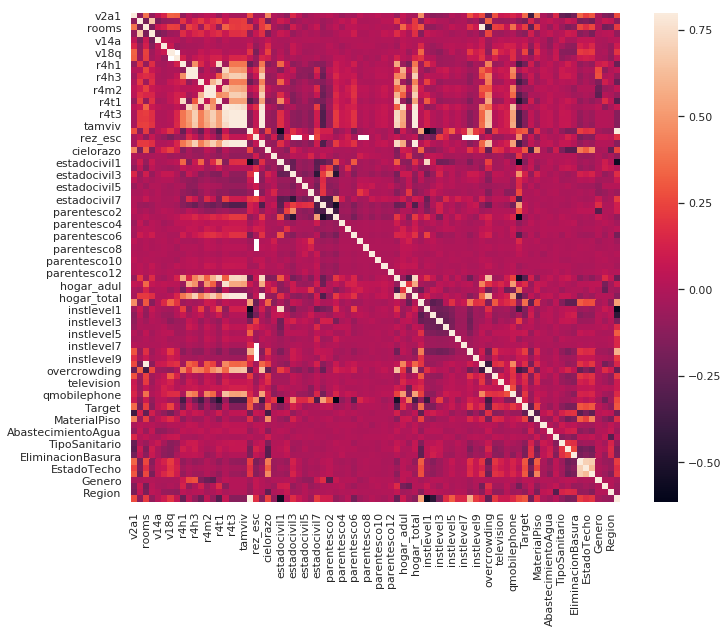

In [14]:
corrmat = ds.corr(method ='spearman')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
corr = ds.corr()
corr.Target.sort_values()

hogar_nin                    -0.324824
r4t1                         -0.310851
overcrowding                 -0.288574
r4m1                         -0.248913
r4h1                         -0.224906
MaterialPared                -0.221527
hacdor                       -0.192102
EnergiaCocina                -0.184605
r4m3                         -0.171702
instlevel2                   -0.157077
tamviv                       -0.153968
EliminacionBasura            -0.152477
instlevel1                   -0.144713
hhsize                       -0.144600
tamhog                       -0.144600
hogar_total                  -0.144600
r4t3                         -0.144533
estadocivil1                 -0.132505
hacapo                       -0.130539
Region                       -0.118716
TipoSanitario                -0.104183
rez_esc                      -0.097123
TipoVivienda                 -0.077799
AbastecimientoAgua           -0.075429
parentesco6                  -0.065574
dis                      

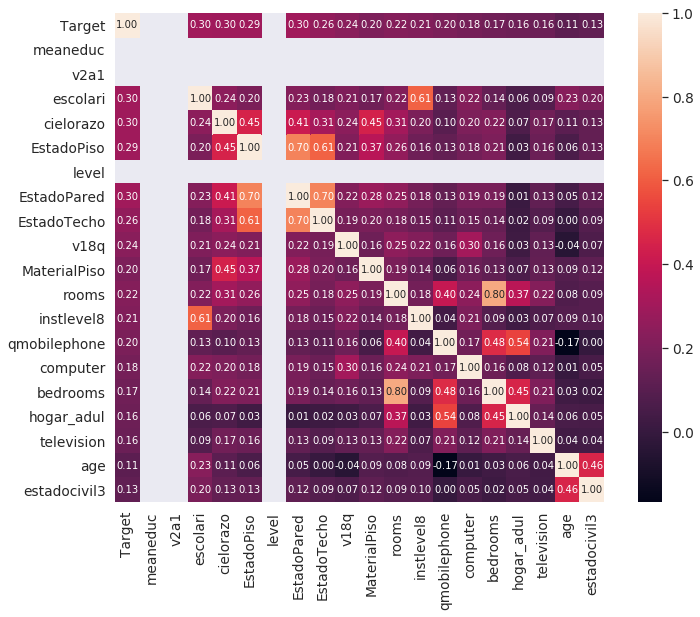

In [16]:
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Target')['Target'].index
cm = np.corrcoef(ds[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

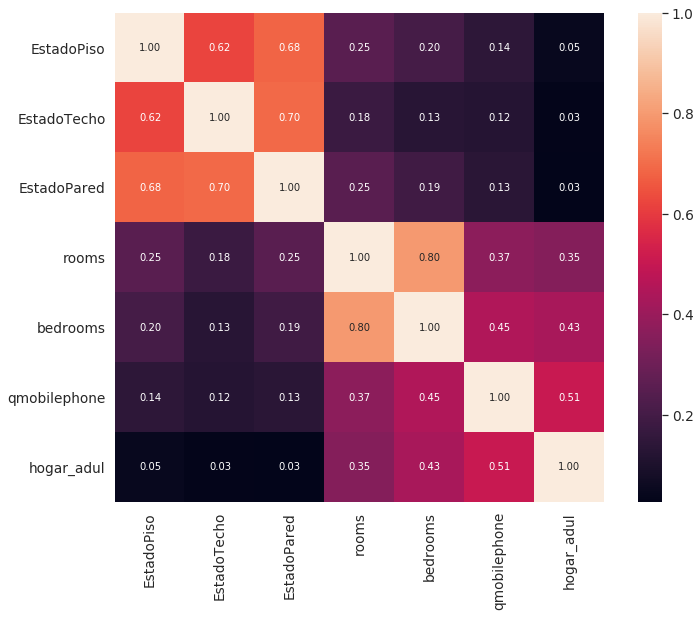

In [17]:
cols = ["EstadoPiso", "EstadoTecho", "EstadoPared", "rooms", "bedrooms", "qmobilephone", "hogar_adul"]
estado = corrmat.loc[cols, cols]
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(estado, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)

In [18]:
df[(df.Target == 1) & (df.v2a1 > 165000)].shape

(13, 18)

In [19]:
df[["age", "escolari", "v2a1"]].iplot(kind='box')

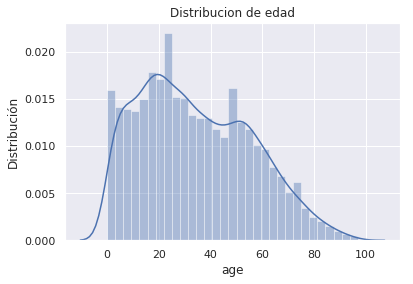

In [20]:
#df['age'].iplot(kind="hist")

# hist_data = [df['age'], df["escolari"]]

# fig = ff.create_distplot(hist_data, ['distplot', "escolari"])
# iplot(fig, filename='Basic Distplot')
sns.set()
plt.title('Distribucion de edad')
plt.xlabel('Edad')
plt.ylabel('Distribución')
sns.distplot(df.age)

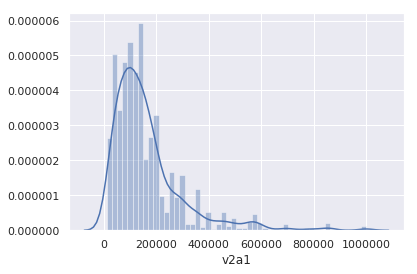

In [21]:
df = df[ (df.v2a1 > 0) & (df.v2a1 < 1500000)]
sns.distplot(df.v2a1)

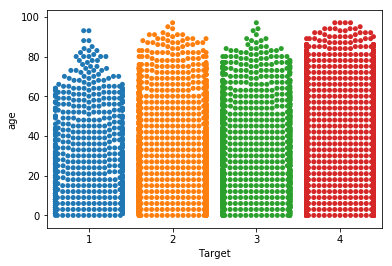

In [9]:
# data = [go.Scatter(x=df.age, y=df.escolari,  mode = 'markers')]

# iplot(data)

sns.swarmplot(x='Target', y='age', data=df)


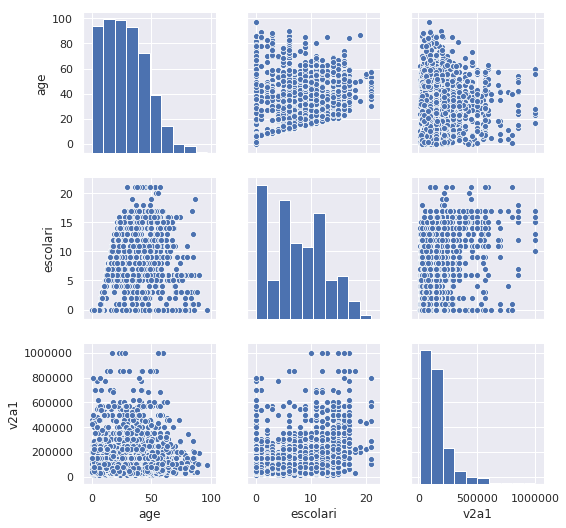

In [30]:
sns.pairplot(df[["age", "escolari", "v2a1"]])
#df[["age", "escolari", "v2a1"]].scatter_matrix()

In [33]:
region_color = {"brunca":"#1f77b4", "central":"#ff7f0e", "chorotega":"#2ca02c", 
         "huetar_atlantica":"#d62728", "huetar_norte":"#9467bd", "pacifico_central":"#8c564b"}


['Central' 'Chorotega' 'Pacífico Central' 'Brunca' 'Huetar Atlántica'
 'Huetar Norte']


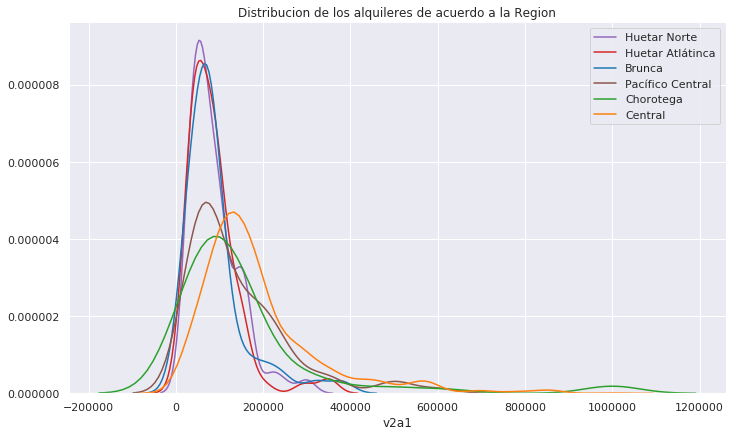

In [34]:
plt.figure(figsize=(40,15))
print(df.Region.unique())
plt.subplot2grid((2,3),(0,0))

sns.distplot(df[df.Region=='Huetar Norte'].v2a1, bins=10 ,label='Huetar Norte', hist=False, color=region_color["huetar_norte"])
sns.distplot(df[df.Region=='Huetar Atlántica'].v2a1, bins=10 ,label='Huetar Atlátinca', hist=False, color=region_color["huetar_atlantica"])
sns.distplot(df[df.Region=='Brunca'].v2a1, bins=10 ,label='Brunca', hist=False, color=region_color["brunca"])
sns.distplot(df[df.Region=='Pacífico Central'].v2a1, bins=10 ,label='Pacífico Central', hist=False, color=region_color["pacifico_central"])
sns.distplot(df[df.Region=='Chorotega'].v2a1, bins=10 ,label='Chorotega', hist=False, color=region_color["chorotega"])
sns.distplot(df[df.Region=='Central'].v2a1, bins=10 ,label='Central', hist=False, color=region_color["central"])

plt.title('Distribucion de los alquileres de acuerdo a la Region')
plt.legend()
sns.despine()

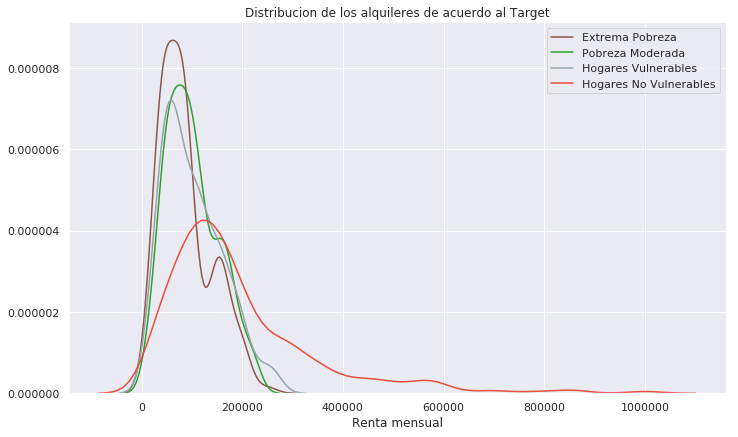

In [68]:
plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(df[df.Target==1].v2a1, bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(df[df.Target==2].v2a1, bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(df[df.Target==3].v2a1, bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(df[df.Target==4].v2a1, bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de los alquileres de acuerdo al Target')
plt.xlabel('Renta mensual')

plt.legend()
sns.despine()

In [70]:
print(df[ (df.Target==1)].shape)
print(df[ (df.Target==1) & (df.v2a1 > 175000) ].shape)
print(df[ (df.Target==4)].shape)
print(df[ (df.Target==4) & (df.v2a1 > 479250) ].shape)


(149, 18)
(8, 18)
(1892, 18)
(116, 18)


In [44]:
data = []

for d in df.groupby("Region"):
    data.append(go.Box(x=d[1].v2a1, name=d[0], boxmean=True))
iplot({
    "data":data,
    "layout": {"title" : 'Rentas mensuales pagadas por region',
              "xaxis" : dict(title = 'Alquiler mensual pagado'),
              "yaxis" : dict(title = 'Region'),
            }
})

#sns.catplot(data=df, x='Region', y='v2a1', kind='box')

(810, 18)


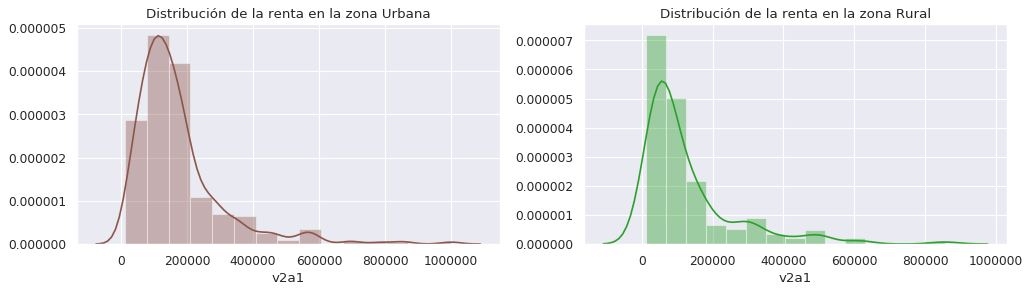

In [46]:
#sns.distplot(df[df.Zona == "Urbana"].v2a1)
sns.set()
figure(num=None, figsize=(15, 8), dpi=80)

dfEdad = df[df.parentesco1  == 1]
print(dfEdad.shape)
subplot(2,2,1)
title('Distribución de la renta en la zona Urbana')
sns.distplot(df[df.Zona == "Urbana"].v2a1, bins=15, color="#8c564b")
subplot(2,2,2)
title('Distribución de la renta en la zona Rural')
sns.distplot(df[df.Zona == "Rural"].v2a1, bins=15, color="#2ca02c")
dfEdad = df[df.age  > 21]


In [39]:
print(df[df.Zona == "Rural"].v2a1.describe())
print(df[df.Zona == "Urbana"].v2a1.describe())


count       445.000000
mean     129096.042697
std      136680.466787
min       12000.000000
25%       45000.000000
50%       80000.000000
75%      150000.000000
max      855810.000000
Name: v2a1, dtype: float64
count       2221.000000
mean      172658.690230
std       136993.983345
min        13000.000000
25%        90000.000000
50%       140000.000000
75%       200000.000000
max      1000000.000000
Name: v2a1, dtype: float64


In [47]:
data = []

for d in df.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].v2a1, name=d[0][0]+"-"+d[0][1], boxmean=True, 
                       marker = dict(color=region_color[slugify(d[0][0], separator='_')],))
               )
iplot({
    "data":data,
    "layout": {"title" : 'Rentas mensuales pagadas dividida por region y tipo de zona',
              "xaxis" : dict(title = 'Region - Zona'),
              "yaxis" : dict(title = 'Alquiler mensual pagado'),
            }
})

<Figure size 1600x800 with 0 Axes>

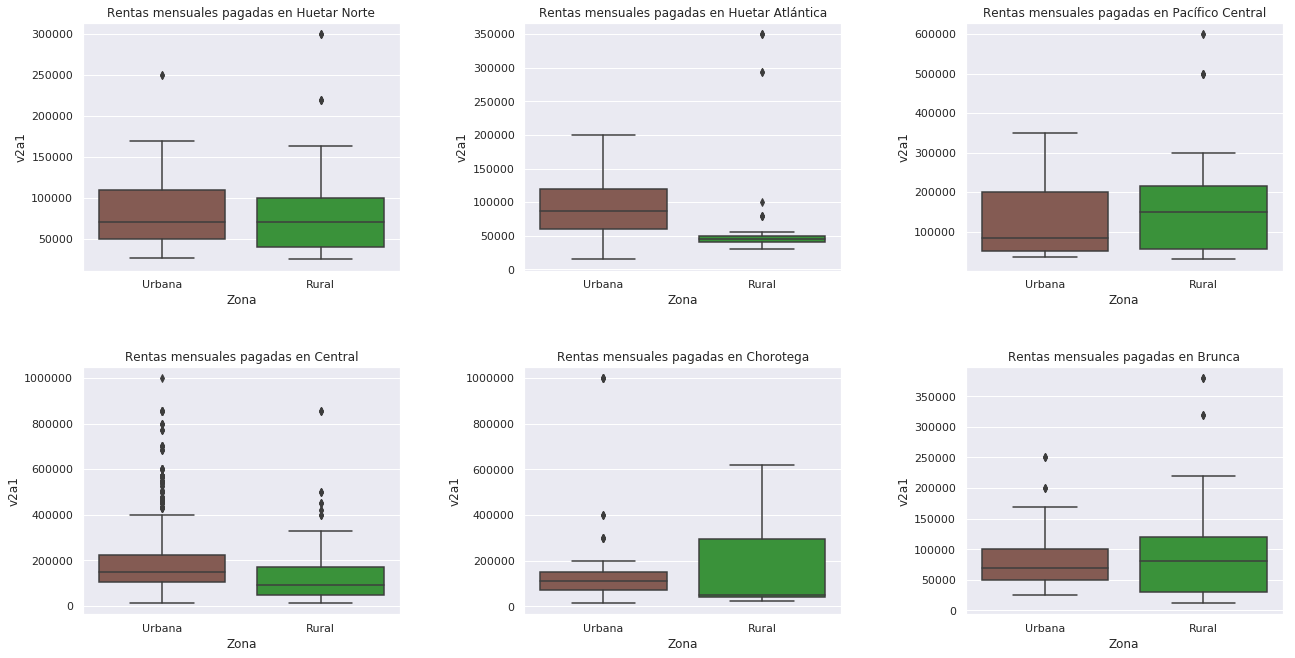

In [66]:
# Analizamos las Rentas mensuales pagadas dividida por region y tipo de zona

from pylab import *
from matplotlib.pyplot import figure



sns.set()
figure(num=None, figsize=(20, 10), dpi=80)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.set_size_inches([20, 10])

flatui = ["#8c564b", "#2ca02c", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

subplot(2,3,1)
title('Rentas mensuales pagadas en Huetar Norte')
sns.boxplot(data=df[df.Region == "Huetar Norte"], y="v2a1", x="Zona")
subplot(2,3,2)
title('Rentas mensuales pagadas en Huetar Atlántica')
sns.boxplot(data=df[df.Region == "Huetar Atlántica"], y="v2a1", x="Zona")
subplot(2,3,3)
title('Rentas mensuales pagadas en Pacífico Central')
sns.boxplot(data=df[df.Region == "Pacífico Central"], y="v2a1", x="Zona")
subplot(2,3,4)
title('Rentas mensuales pagadas en Central')
sns.boxplot(data=df[df.Region == "Central"], y="v2a1", x="Zona")
subplot(2,3,5)
title('Rentas mensuales pagadas en Chorotega')
sns.boxplot(data=df[df.Region == "Chorotega"], y="v2a1", x="Zona")
subplot(2,3,6)
title('Rentas mensuales pagadas en Brunca')
sns.boxplot(data=df[df.Region == "Brunca"], y="v2a1", x="Zona")

In [30]:
data = []

for d in df.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].age, name=d[0][0]+"-"+d[0][1], boxmean=True))
iplot({
    "data":data,
    "layout": {"title" : 'Rentas mensuales pagadas dividida por region y tipo de zona',
              "xaxis" : dict(title = 'Region - Zona'),
              "yaxis" : dict(title = 'Alquiler mensual pagado'),
            }
})

In [118]:
data = []
dfEdad = df[df.age > 21]

for d in dfEdad.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].escolari, name=d[0][0]+"-"+d[0][1], boxmean=True))
iplot({
    "data":data,
    "layout": {"title" : 'Años de escolaridad por region y tipo de zona',
              "xaxis" : dict(title = 'Region - Zona'),
              "yaxis" : dict(title = 'Alquiler mensual pagado'),
            }
})

In [87]:
data = []
dfPaga = df[df["v2a1"] > 0]
print(dfPaga.groupby(["Target"]).describe())

for d in dfPaga.groupby(["Target"]):
    data.append(go.Box(y=d[1].v2a1, name=d[0], boxmean=True))
iplot(data)


          v2a1                                                             \
         count           mean            std      min       25%       50%   
Target                                                                      
1        149.0   87083.147651   50721.859352  15000.0   50000.0   80000.0   
2        325.0  100597.264615   51448.966694  12000.0   62539.0   90000.0   
3        300.0  102618.093333   58996.916717  13000.0   50000.0   90000.0   
4       1892.0  192636.237844  151700.868252  16000.0  100000.0  150000.0   

                                age                                         \
             75%        max   count       mean        std  min   25%   50%   
Target                                                                       
1       100000.0   249896.0   149.0  20.812081  16.986230  0.0   7.0  19.0   
2       140000.0   225000.0   325.0  23.833846  18.624210  0.0   9.0  19.0   
3       150000.0   270000.0   300.0  25.660000  18.315273  0.0  10.0  

In [40]:
data = []
dfPaga = df[df["v2a1"] > 0]
for d in dfPaga.groupby(["Target"]):
    data.append(go.Box(y=d[1].escolari, name=d[0], boxmean=True))
iplot(data)

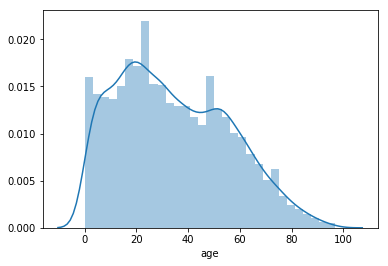

In [26]:

# data = [
#      go.Histogram(x=df["age"],opacity=0.75,name="global", nbinsx = 20),
# ]

# iplot(go.Figure(data=data, layout=go.Layout(barmode='overlay')))
sns.distplot(df.age)

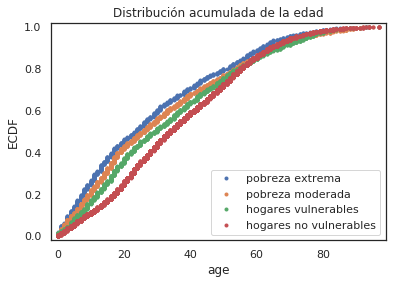

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements.
    Empirical Cumulative Distribution Functions
    """
    # Number of data points: n
    count = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / len(data)

    return x, y

x4, y4 = ecdf(df[df.Target == 4].age)
x3, y3 = ecdf(df[df.Target == 3].age)
x2, y2 = ecdf(df[df.Target == 2].age)
x1, y1 = ecdf(df[df.Target == 1].age)

plt.plot(x1, y1, marker='.', linestyle='none')
plt.plot(x2, y2, marker='.', linestyle='none')
plt.plot(x3, y3, marker='.', linestyle='none')
plt.plot(x4, y4, marker='.', linestyle='none')
plt.legend(('pobreza extrema', 'pobreza moderada', 'hogares vulnerables', "hogares no vulnerables"), loc='lower right')
plt.xlabel('age')
plt.ylabel('ECDF')
plt.title("Distribución acumulada de la edad")
plt.margins(0.02) # Keeps data off plot edges
plt.show()
    

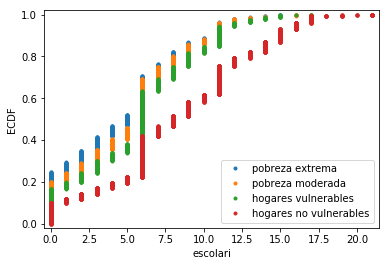

In [38]:
x4, y4 = ecdf(df[df.Target == 4].escolari)
x3, y3 = ecdf(df[df.Target == 3].escolari)
x2, y2 = ecdf(df[df.Target == 2].escolari)
x1, y1 = ecdf(df[df.Target == 1].escolari)

plt.plot(x1, y1, marker='.', linestyle='none')
plt.plot(x2, y2, marker='.', linestyle='none')
plt.plot(x3, y3, marker='.', linestyle='none')
plt.plot(x4, y4, marker='.', linestyle='none')
plt.legend(('pobreza extrema', 'pobreza moderada', 'hogares vulnerables', "hogares no vulnerables"), loc='lower right')
plt.xlabel('escolari')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

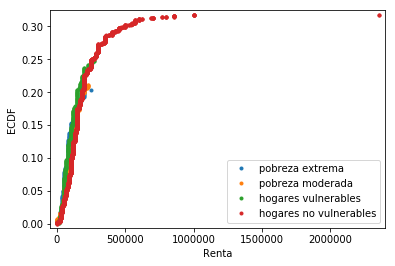

In [49]:
x4, y4 = ecdf(df[df.Target == 4].v2a1)
x3, y3 = ecdf(df[df.Target == 3].v2a1)
x2, y2 = ecdf(df[df.Target == 2].v2a1)
x1, y1 = ecdf(df[df.Target == 1].v2a1)

plt.plot(x1, y1, marker='.', linestyle='none')
plt.plot(x2, y2, marker='.', linestyle='none')
plt.plot(x3, y3, marker='.', linestyle='none')
plt.plot(x4, y4, marker='.', linestyle='none')
plt.legend(('pobreza extrema', 'pobreza moderada', 'hogares vulnerables', "hogares no vulnerables"), loc='lower right')
plt.xlabel('Renta')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

In [79]:
#df.pivot_table(index="age", columns=["age", "escolari"])
#df.groupby(["escolari", 'age',]).aggregate('count')

def institution(row):
    for x in range(1, 10):
        if row["instlevel"+str(x)] == 1:
            return str(x)
df["level"] = df.apply(institution, axis=1)


In [21]:
df.pivot_table(values='escolari',index='age',columns='level', aggfunc=len)
#seaborn.barplot(data=df, x='age', y='instlevel1',)
# plt.ylabel('Nivel de satisfacción con el sueldo')
# plt.xlabel('Bono recibido')
# plt.ylim(0, 4)
# plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# seaborn.despine(left=True)

level,1,2,3,4,5,6,7,8,9
age,,,,,,,,,
0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,96.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(6335, 16)


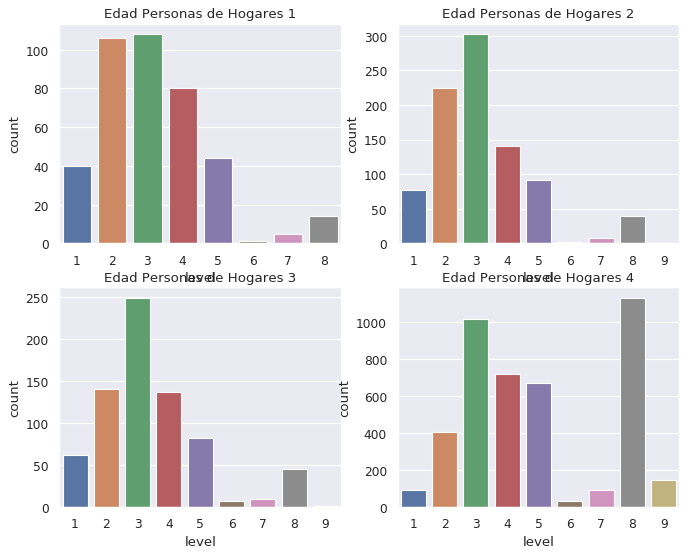

In [69]:
# Analizamos la distribución de la edad de los individuos

sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
dfEdad = df[df.age > 21]
print(dfEdad.shape)
subplot(2,2,1)
title('Edad Personas de Hogares 1')
sns.countplot(data=dfEdad[dfEdad["Target"] == 1].sort_values("level"), x="level")
subplot(2,2,2)
title('Edad Personas de Hogares 2')
sns.countplot(data=dfEdad[dfEdad["Target"] == 2].sort_values("level"), x="level")
subplot(2,2,3)
title('Edad Personas de Hogares 3')
sns.countplot(data=dfEdad[dfEdad["Target"] == 3].sort_values("level"), x="level")
subplot(2,2,4)
title('Edad Personas de Hogares 4')
sns.countplot(data=dfEdad[dfEdad["Target"] == 4].sort_values("level"), x="level")


(2973, 18)


<Figure size 1600x800 with 0 Axes>

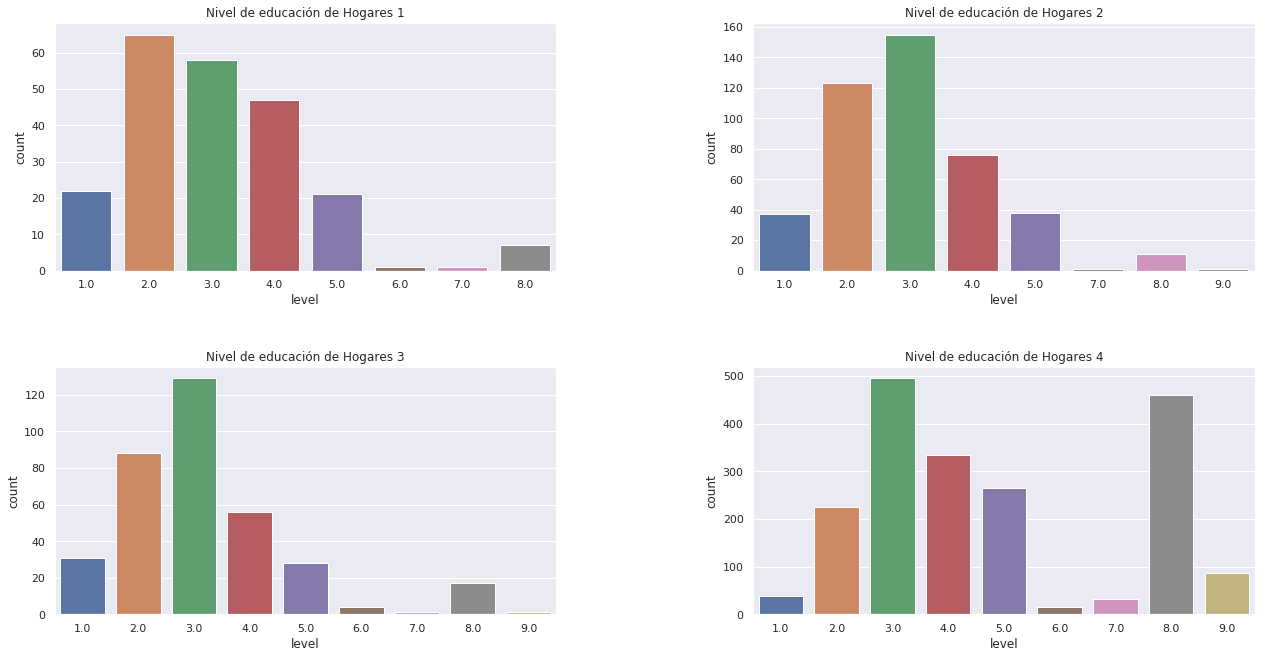

In [223]:
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(20, 10), dpi=80)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.set_size_inches([20, 10])
dfEdad = df[df.parentesco1  == 1]
print(dfEdad.shape)
subplot(2,2,1)
title('Nivel de educación de Hogares 1')
sns.countplot(data=dfEdad[dfEdad["Target"] == 1].sort_values("level"), x="level")
subplot(2,2,2)
title('Nivel de educación de Hogares 2')
sns.countplot(data=dfEdad[dfEdad["Target"] == 2].sort_values("level"), x="level")
subplot(2,2,3)
title('Nivel de educación de Hogares 3')
sns.countplot(data=dfEdad[dfEdad["Target"] == 3].sort_values("level"), x="level")
subplot(2,2,4)
title('Nivel de educación de Hogares 4')
sns.countplot(data=dfEdad[dfEdad["Target"] == 4].sort_values("level"), x="level")


(810, 18)


<Figure size 1600x800 with 0 Axes>

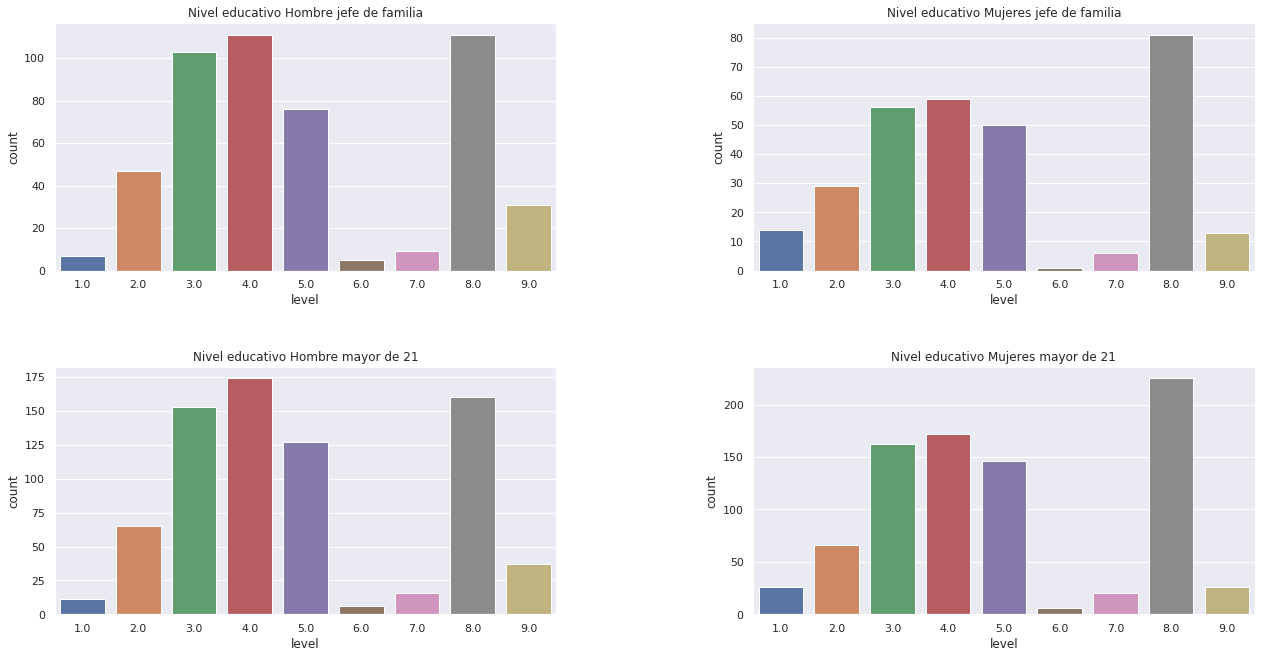

In [117]:
sns.set()
sns.set()
figure(num=None, figsize=(20, 10), dpi=80)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.set_size_inches([20, 10])

dfEdad = df[df.parentesco1  == 1]
print(dfEdad.shape)
subplot(2,2,1)
title('Nivel educativo Hombre jefe de familia')
sns.countplot(data=dfEdad[dfEdad["Genero"] == "male"].sort_values("level"), x="level")
subplot(2,2,2)
title('Nivel educativo Mujeres jefe de familia')
sns.countplot(data=dfEdad[dfEdad["Genero"] == "female"].sort_values("level"), x="level")
dfEdad = df[df.age  > 21]
subplot(2,2,3)
title('Nivel educativo Hombre mayor de 21')
sns.countplot(data=dfEdad[dfEdad["Genero"] == "male"].sort_values("level"), x="level")
subplot(2,2,4)
title('Nivel educativo Mujeres mayor de 21')
sns.countplot(data=dfEdad[dfEdad["Genero"]  == "female"].sort_values("level"), x="level")

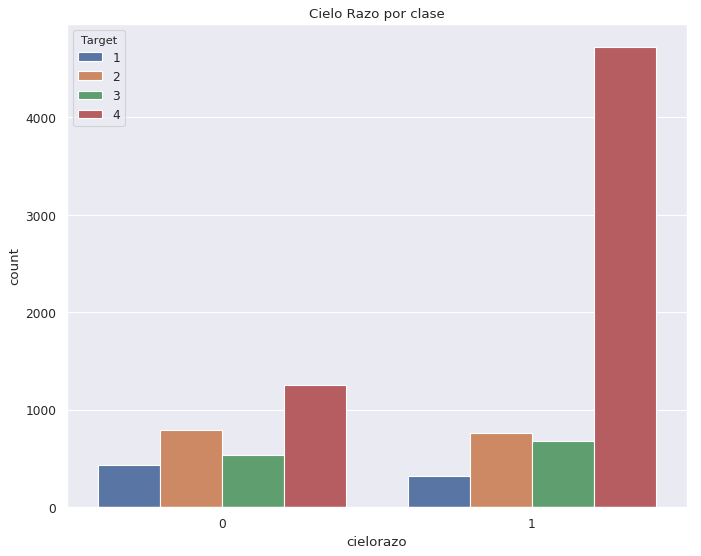

In [144]:
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
title('Cielo Razo por clase')
sns.countplot(data=ds.sort_values("cielorazo"), x="cielorazo", hue="Target")


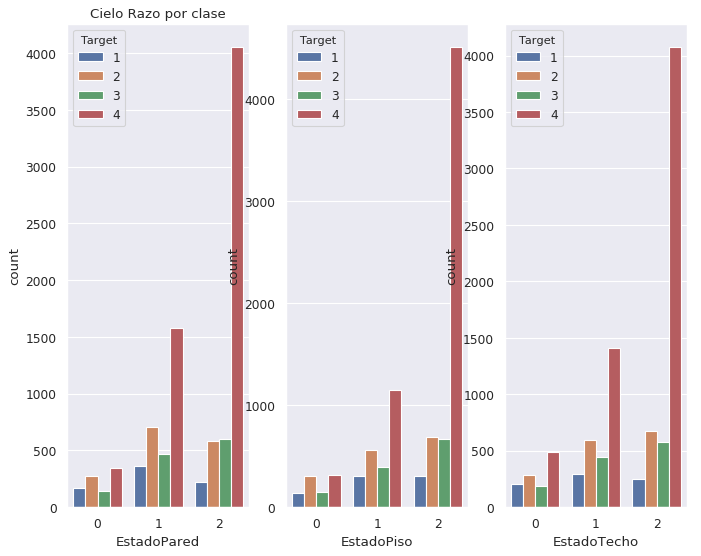

In [150]:
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
subplot(1,3,1)
title('Cielo Razo por clase')
sns.countplot(data=ds, x="EstadoPared", hue="Target")
subplot(1,3,2)
sns.countplot(data=ds, x="EstadoPiso", hue="Target")
subplot(1,3,3)
sns.countplot(data=ds, x="EstadoTecho", hue="Target")

(254, 86)

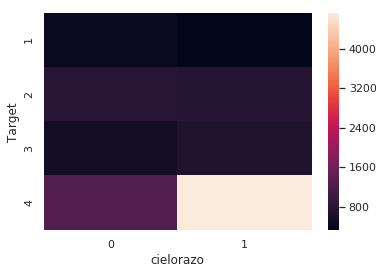

In [142]:
exp = ds[["cielorazo", "Target"]]
exp = exp.pivot_table(index='Target', columns="cielorazo", aggfunc=len, fill_value=0)
sns.heatmap(exp)

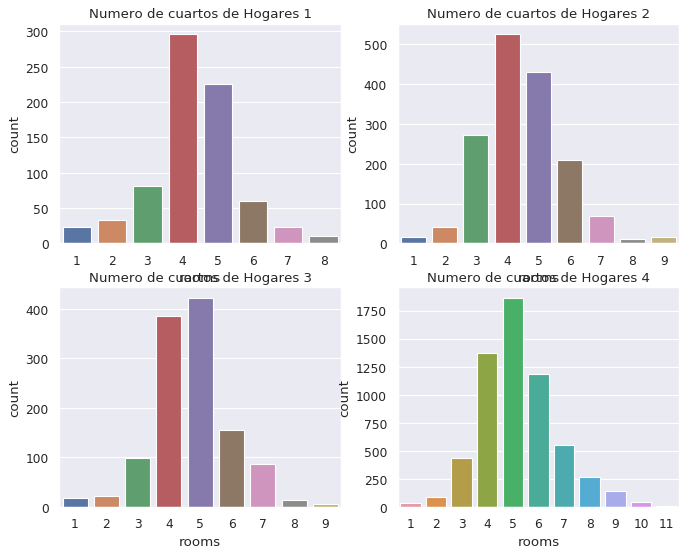

In [20]:
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
subplot(2,2,1)
title('Numero de cuartos de Hogares 1')
sns.countplot(data=ds[ds["Target"] == 1].sort_values("rooms"), x="rooms")
subplot(2,2,2)
title('Numero de cuartos de Hogares 2')
sns.countplot(data=ds[ds["Target"] == 2].sort_values("rooms"), x="rooms")
subplot(2,2,3)
title('Numero de cuartos de Hogares 3')
sns.countplot(data=ds[ds["Target"] == 3].sort_values("rooms"), x="rooms")
subplot(2,2,4)
title('Numero de cuartos de Hogares 4')
sns.countplot(data=ds[ds["Target"] == 4].sort_values("rooms"), x="rooms")

<Figure size 1600x800 with 0 Axes>

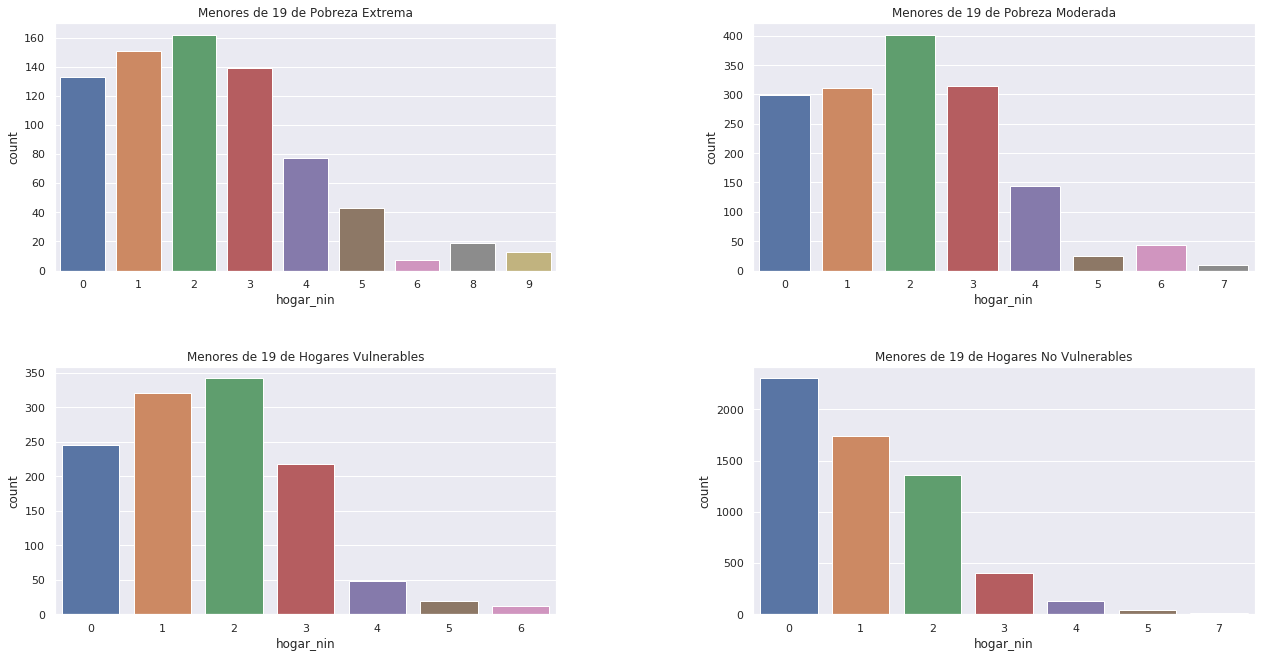

In [116]:
sns.set()
figure(num=None, figsize=(20, 10), dpi=80)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.set_size_inches([20, 10])

subplot(2,2,1)
title('Menores de 19 de Pobreza Extrema')
sns.countplot(data=ds[ds["Target"] == 1].sort_values("rooms"), x="hogar_nin")
subplot(2,2,2)
title('Menores de 19 de Pobreza Moderada')
sns.countplot(data=ds[ds["Target"] == 2].sort_values("rooms"), x="hogar_nin")
subplot(2,2,3)
title('Menores de 19 de Hogares Vulnerables')
sns.countplot(data=ds[ds["Target"] == 3].sort_values("rooms"), x="hogar_nin")
subplot(2,2,4)
title('Menores de 19 de Hogares No Vulnerables')
sns.countplot(data=ds[ds["Target"] == 4].sort_values("rooms"), x="hogar_nin")


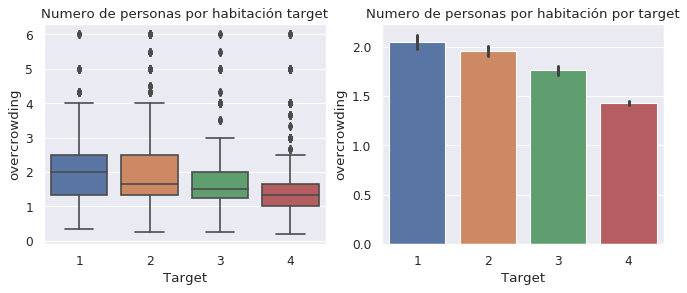

In [34]:
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
subplot(2,2,1)
title('Numero de personas por habitación target')
sns.boxplot(data=ds, x='Target', y='overcrowding')
subplot(2,2,2)
title('Numero de personas por habitación por target')
sns.barplot(data=ds, x='Target', y='overcrowding')

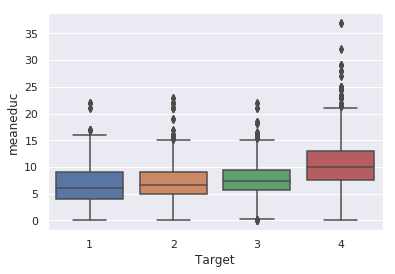

In [36]:
sns.boxplot(data=ds, x='Target', y='meaneduc')

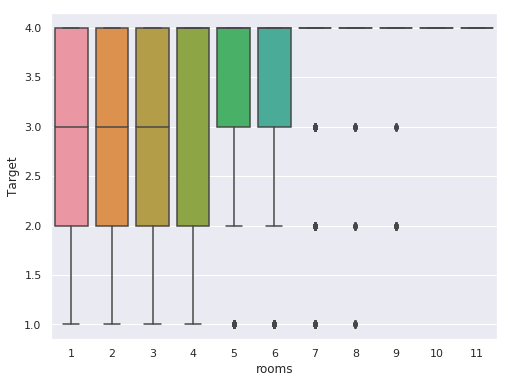

In [69]:
data = pd.concat([ds['Target'], ds["rooms"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="rooms", y="Target", data=data)


In [16]:
from scipy import stats

# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.normsns.countplot(data=df[df["Target"] == 1].sort_values("level"), x="level").fit(df.age)
loc, scale

AttributeError: module 'scipy.stats' has no attribute 'normsns'

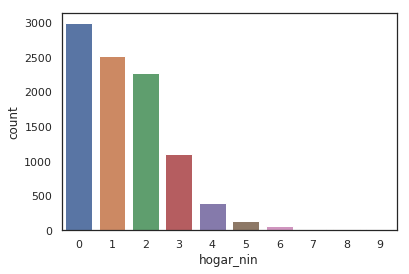

In [19]:
sns.countplot(ds.hogar_nin)

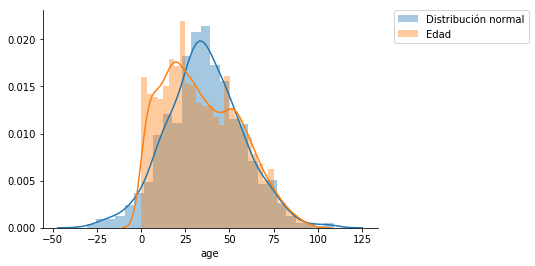

In [45]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
sns.distplot(sample, label='Distribución normal')
sns.distplot(df.age, label='Edad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.despine()

In [34]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(df["age"], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(df["age"])), percs)

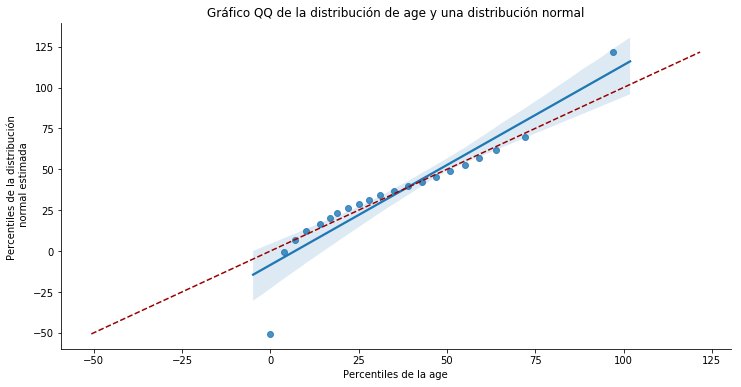

In [39]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la age')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de age y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#990000", ls="--")

sns.despine()

In [42]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_age = numpy.percentile(df["age"], percs)
qn_escolari = numpy.percentile(df["escolari"], percs)

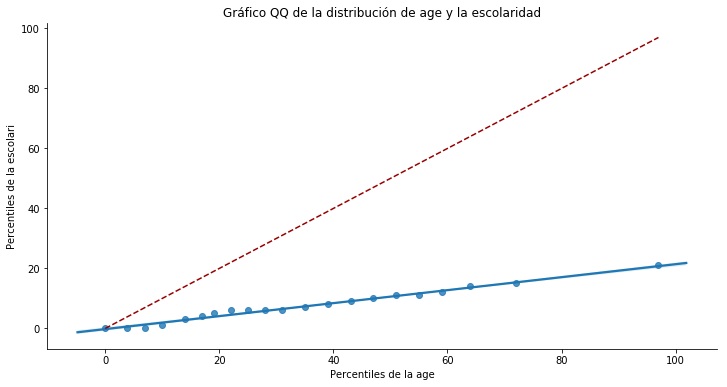

In [44]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_age, y=qn_escolari)
plt.xlabel('Percentiles de la age')
plt.ylabel('Percentiles de la escolari')
plt.title('Gráfico QQ de la distribución de age y la escolaridad')

x = numpy.linspace(numpy.min((qn_age.min(), qn_escolari.min())), numpy.max((qn_age.max(),qn_escolari.max())))
plt.plot(x,x, color="#990000", ls="--")

sns.despine()

- Qué tipo de variable es cada una?

edad, escolari y v2a1 son variables continuas

- Existen outliers en las variables seleccionadas?

General no

- Hay valores faltantes? Qué decisión tomarán al respecto en esta instancia de análisis? Es mejor descartarlos o completarlos con un valor particular?

v2a1 es el unico que tiene valores en NAN, y prefiero dejarlos asi porque probablemente propietarios de su casa

- Cómo es la distribución de las variables en el dataset? Se distribuyen de manera normal? Qué implicancias tiene esto?


- Cómo es la distribución condicionada a otra variable?

In [274]:
#dfHogar = ds.drop_duplicates(subset=['idHogar']) .drop_duplicates(subset ="idhogar")
dfHogar = ds[ds.parentesco1==1]
print(dfHogar.shape)

print(dfHogar[(dfHogar.Target==1)].shape[0]/dfHogar.shape[0]*100)
print(dfHogar[(dfHogar.Zona=="Rural")].shape[0]/dfHogar.shape[0]*100)
print(dfHogar[(dfHogar.Zona=="Rural") | (dfHogar.Target==1) ].shape[0]/dfHogar.shape[0]*100)
print(dfHogar[(dfHogar.Zona=="Rural") & (dfHogar.Target==1) ].shape[0]/dfHogar.shape[0]*100)
print(dfHogar[(dfHogar.parentesco1==1) & (dfHogar.Target==1) & (dfHogar.Genero==0) ].shape[0]/dfHogar.shape[0]*100)

(2951, 86)
7.35343951202982
28.49881396136903
33.17519484920366
2.677058624195188
3.8292104371399525


In [268]:
dfHogar[(dfHogar.parentesco1==1) & (dfHogar.Target==1) & (dfHogar.Genero==1) ].shape

(104, 86)

In [269]:
print(dfHogar[(dfHogar.Zona=="Rural") & (dfHogar.Target==1) ].shape)
print(dfHogar[(dfHogar.Zona=="Rural") ].shape)
print(dfHogar[(dfHogar.Target==1) ].shape)
print(dfHogar[(dfHogar.Target==2) ].shape)
print(dfHogar[(dfHogar.Target==3) ].shape)
print(dfHogar[(dfHogar.Target==4) ].shape)
print(dfHogar.shape)

(79, 86)
(841, 86)
(217, 86)
(431, 86)
(354, 86)
(1949, 86)
(2951, 86)


In [270]:
pa =  dfHogar[(dfHogar.Target==1)].shape[0]/dfHogar.shape[0]
pb = dfHogar[(dfHogar.Zona=="Rural")].shape[0]/dfHogar.shape[0]
pa*pb

0.02095643046295181

In [271]:
pa =  dfHogar[(dfHogar.Target==1)].shape[0]/dfHogar.shape[0]*100
pb = dfHogar[(dfHogar.Zona=="Rural")].shape[0]/dfHogar.shape[0]*100
pab = dfHogar[(dfHogar.Zona=="Rural") | (dfHogar.Target==1) ].shape[0]/dfHogar.shape[0]*100
pa + pb - pab

2.6770586241951904

In [272]:
pa =  ds[(ds.Target==1)].shape[0]/ds.shape[0]*100
pb = ds[(ds['parentesco1']==1)].shape[0]/ds.shape[0]*100

pab = ds[(ds.parentesco1==1) | (ds.Target==1) | (ds.Genero==0) ].shape[0]/ds.shape[0]*100
pa + pb - pab


-33.9909273130077

In [177]:
ds[(ds.parentesco1==1) & (ds.Target==1)  ][["Genero"]]

,Genero
157,1
200,0
237,0
282,0
433,0
610,0
812,0
817,0
828,0
914,1


In [265]:
dict(zip(leGenero.classes_,leGenero.transform(leGenero.classes_)))

{'female': 0, 'male': 1}